In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats  
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import OLS
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.dummy import DummyRegressor


In [67]:
data = pd.read_csv("data/kc_house_data.csv")

# Data Understanding

In [68]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [69]:
#suggestion for the project to save time
irrelevant_columns = ['date',
'view',
'sqft_above',
'sqft_basement',
'yr_renovated',
'zipcode',
'lat',
'long',
'sqft_living15',
'sqft_lot15', 'id']

In [70]:
df=data.drop(irrelevant_columns, axis=1).copy()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [72]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [73]:
df.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [74]:
df.waterfront.fillna(value=0, inplace = True)

In [75]:
df.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [76]:
for col in df.columns:
    try:
        print(col, df[col].value_counts())
    except:
        print(col, df[col].value_counts())   
    print('\n')

price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
285750.0      1
162950.0      1
612995.0      1
255544.0      1
897000.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1010    129
1660    129
       ... 
2678      1
6900      1
6980      1
3078      1
2031      1
Name: sqft_living, Length: 1034, dtype: i

In [77]:
print('bathrooms', sorted(set(df['bathrooms'])))

bathrooms [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.5, 7.75, 8.0]


In [78]:
print('bedrooms', set(df['bedrooms']))

bedrooms {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33}


In [79]:
#typo or outlier, need to drop 
df.loc[df['bedrooms']==33,['bathrooms']]

,bathrooms
15856,1.75


In [80]:
df=df.drop(df[df['bedrooms']==33].index).copy()

In [81]:
for col in df.columns:
    try:
        print(col, df[col].nunique())
    except:
        print(col, df[col].nunique())   
    print('\n')

price 3622


bedrooms 11


bathrooms 29


sqft_living 1034


sqft_lot 9776


floors 6


waterfront 2


condition 5


grade 11


yr_built 116




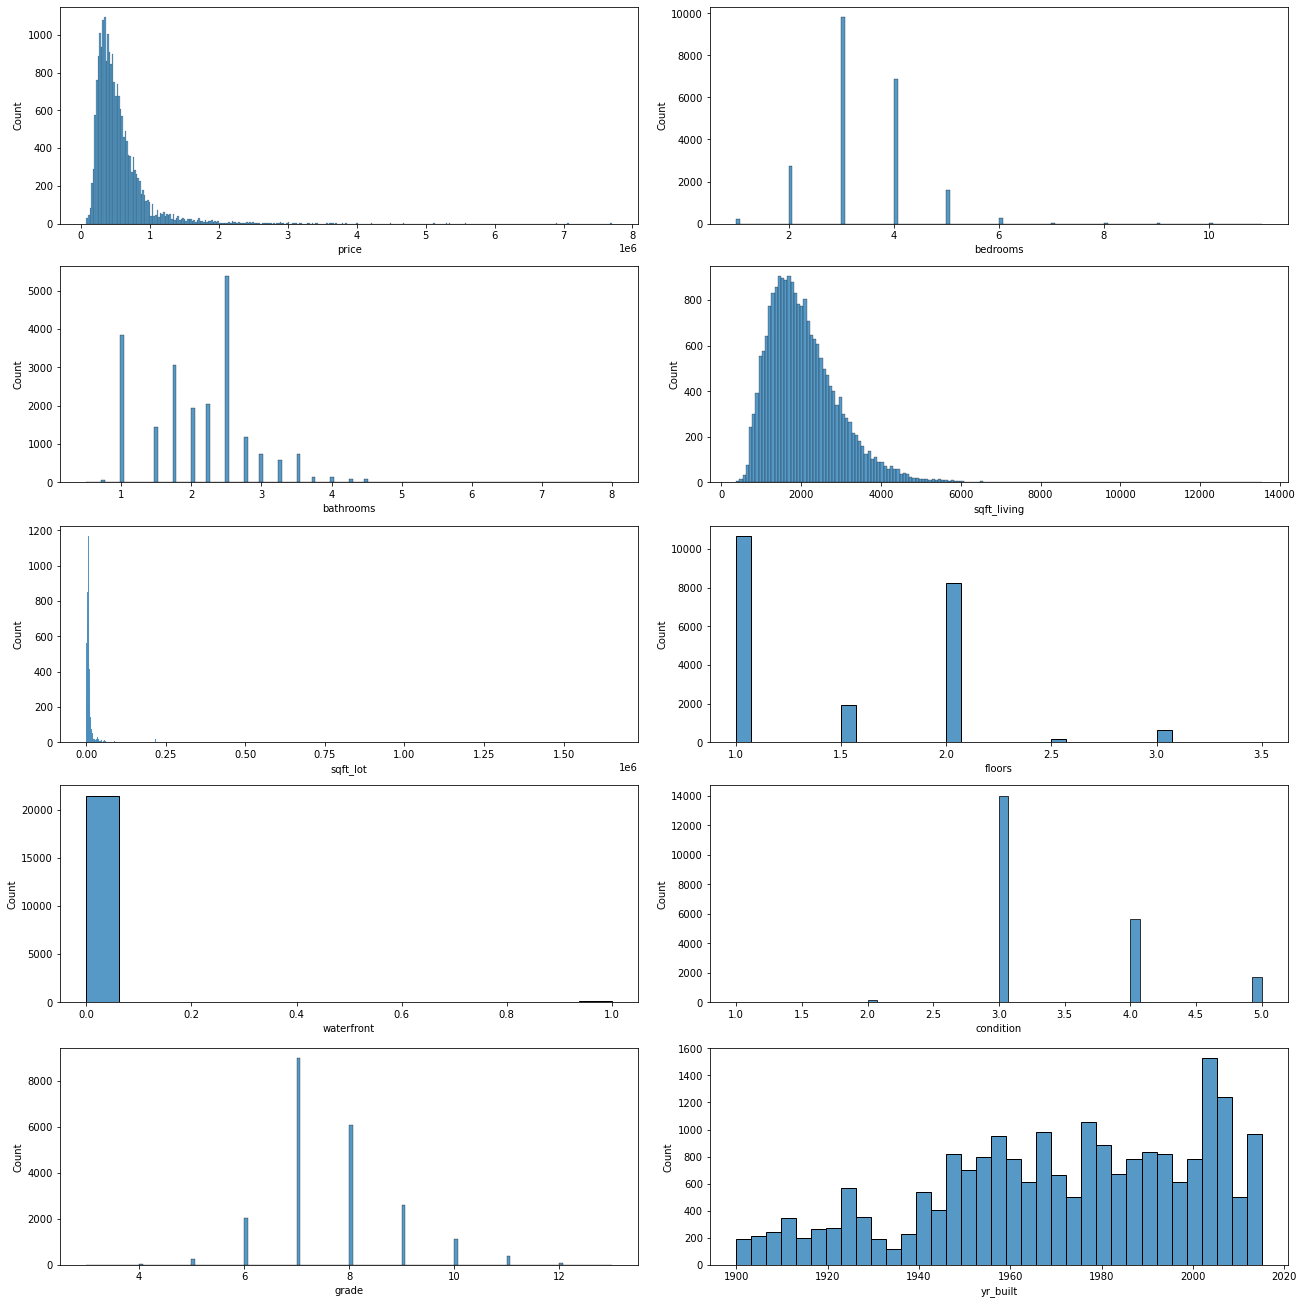

In [82]:
f, axes = plt.subplots(nrows=5, ncols=2, figsize=(18,18) ,constrained_layout=True)

for axx, column in zip(axes.flatten(), df.columns):
    sns.histplot(x=df[column], data=df,ax=axx)
   

In [83]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['sqft_living'].quantile(q=q)))

0.9 percentile: 3255.0
0.91 percentile: 3340.0
0.92 percentile: 3420.0
0.93 percentile: 3510.0
0.94 percentile: 3630.0
0.95 percentile: 3760.0
0.96 percentile: 3920.0
0.97 percentile: 4140.0
0.98 percentile: 4410.0


In [84]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['price'].quantile(q=q)))

0.9 percentile: 887000.0
0.91 percentile: 919994.5
0.92 percentile: 950000.0
0.93 percentile: 997967.5000000001
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0


In [85]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['sqft_lot'].quantile(q=q)))

0.9 percentile: 21372.0
0.91 percentile: 24151.70000000002
0.92 percentile: 28506.400000000023
0.93 percentile: 34848.0
0.94 percentile: 37643.5
0.95 percentile: 43308.75
0.96 percentile: 50655.600000000006
0.97 percentile: 67384.89999999976
0.98 percentile: 107157.0


In [86]:
stats.kurtosis(df.sqft_living)

5.250278624437211

In [87]:
stats.skew(df.sqft_living)

1.4730409364724821

In [88]:
stats.skew(df.sqft_lot)

13.071406775919803

kurtosis higher than 3 indicates heavier tails than a normal distribution

In [89]:
stats.kurtosis(df.sqft_lot)

285.4168446506654

A high positive skewness is observed as there are more values on the left side of the 
distribution mean than those on right side, longer tail to the right side 

In [90]:
#will need to log transform later
loglot= np.log(df.sqft_lot)

In [91]:
stats.kurtosis(loglot)

3.3286839377382753

In [92]:
stats.skew(loglot)

0.9623750156615982

In [93]:
#better without log transfomation 
logliv= np.log(df.sqft_living)

In [94]:
stats.kurtosis(logliv)

-0.0793932778715023

In [95]:
stats.skew(logliv)

-0.027409771717033345

In [96]:
df2=df.loc[(df['sqft_lot'] <= 67384) & (df['sqft_living'] <= 4140)]

In [97]:
df2.shape

(20387, 10)

In [98]:
df.shape

(21596, 10)

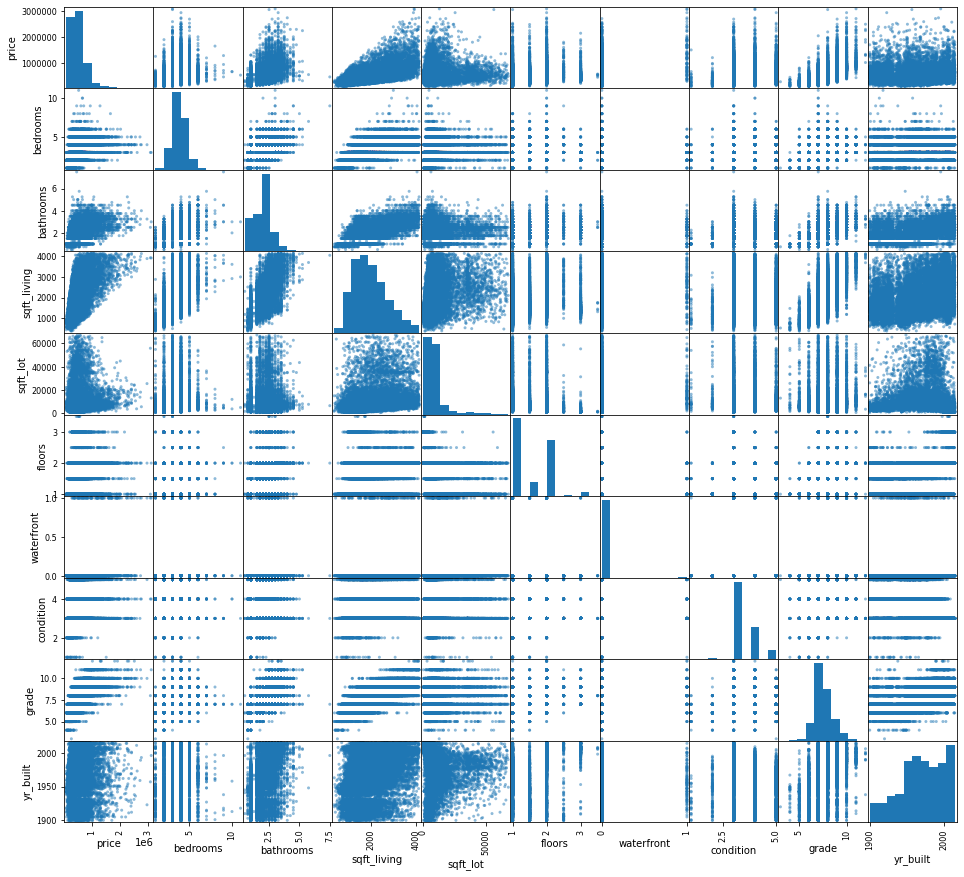

In [99]:
pd.plotting.scatter_matrix(df2,figsize  = [16, 15]);

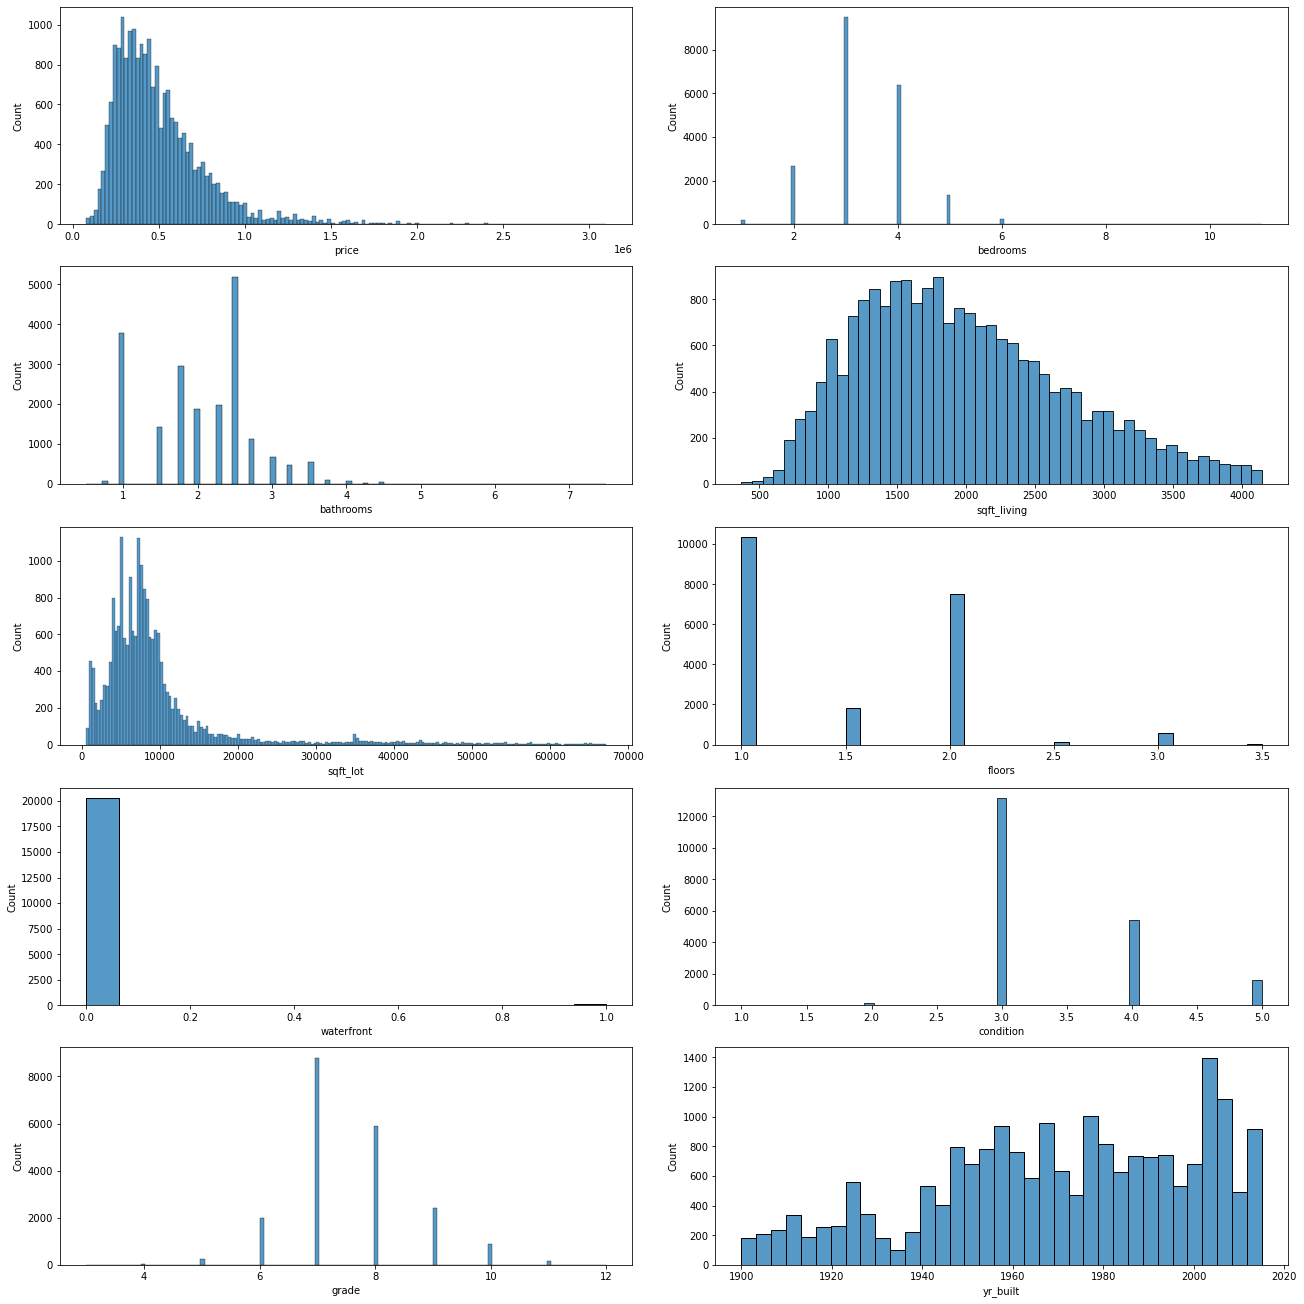

In [100]:
f, axes = plt.subplots(nrows=5, ncols=2, figsize=(18,18) ,constrained_layout=True)

for axx, column in zip(axes.flatten(), df2.columns):
    sns.histplot(x=df2[column], data=df2,ax=axx)

<AxesSubplot:>

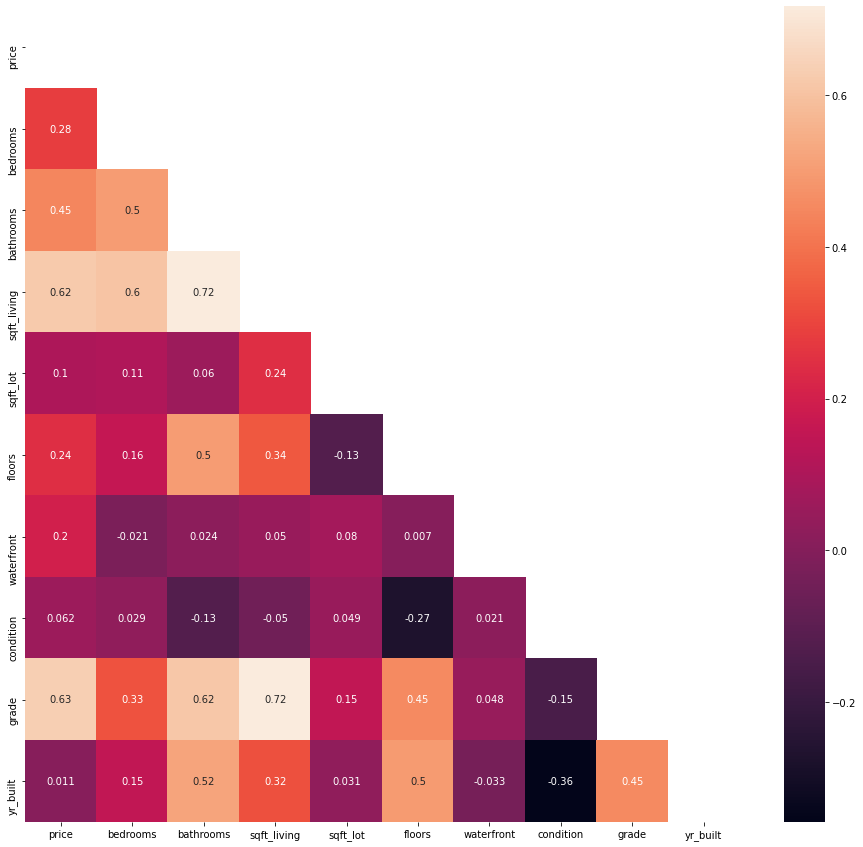

In [101]:
#checking for correlation and considering multicollinearity 
corr= df2.corr()
fig, axes = plt.subplots( figsize=(16,15))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype = bool)), annot=True)

In [102]:
print(abs(corr) > 0.60)

             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price         True     False      False         True     False   False   
bedrooms     False      True      False         True     False   False   
bathrooms    False     False       True         True     False   False   
sqft_living   True      True       True         True     False   False   
sqft_lot     False     False      False        False      True   False   
floors       False     False      False        False     False    True   
waterfront   False     False      False        False     False   False   
condition    False     False      False        False     False   False   
grade         True     False       True         True     False   False   
yr_built     False     False      False        False     False   False   

             waterfront  condition  grade  yr_built  
price             False      False   True     False  
bedrooms          False      False  False     False  
bathrooms         False

> Note
> - price and sqft_living and grade
> - bathrooms  and sqft_living and grade  


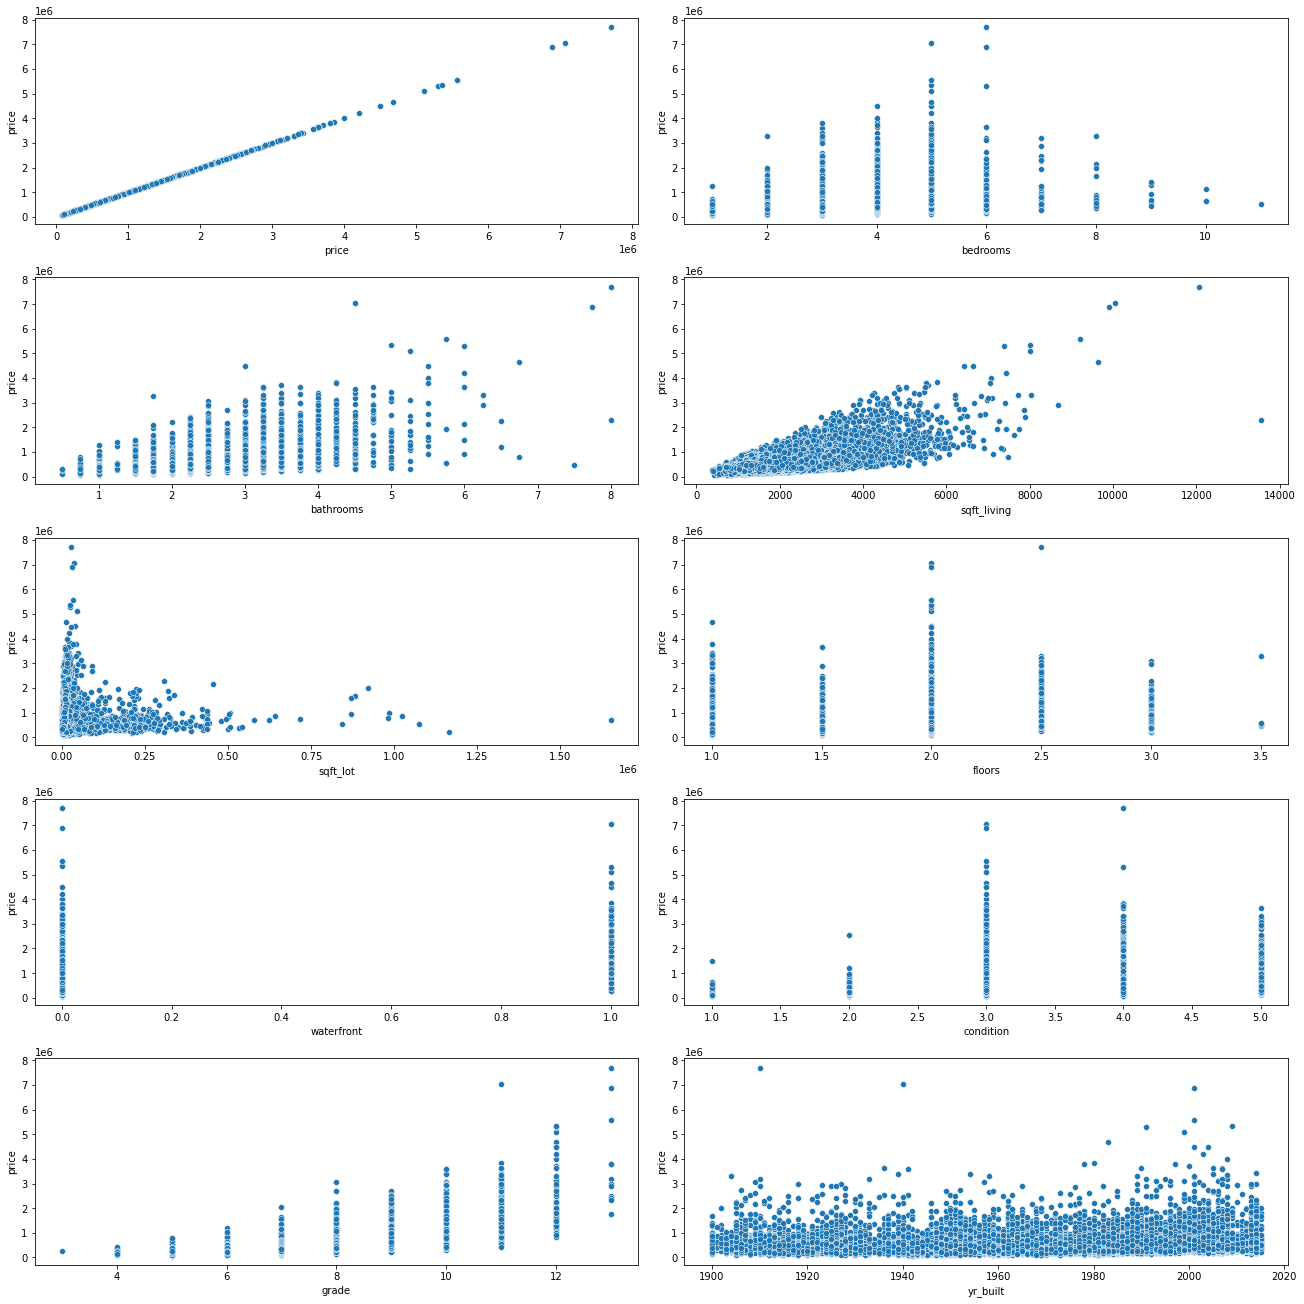

In [103]:
#checking for linear relationship with price 
f, axes = plt.subplots(nrows=5, ncols=2, figsize=(18,18) ,constrained_layout=True)
for axx, column in zip(axes.flatten(), df.columns):
    sns.scatterplot(x=df[column], y= df['price'], data=df,ax=axx) 

# Data Preparation

In [104]:
x=df2.drop('price', axis=1).copy()
y=df2['price']

In [40]:
#Binning yr_built
bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels = [1,2,3,4,5,6]
x['yr_built_binned'] = pd.cut(x['yr_built'], bins,labels=labels, include_lowest = True)

In [41]:
x['yr_built_binned'].isna().sum()

0

In [42]:
set(x['yr_built_binned'])

{1, 2, 3, 4, 5, 6}

In [43]:
#spliting data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
#testing for VIF
vif = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
pd.Series(vif, index=x_train.columns, name="Variance Inflation Factor")            

bedrooms            26.036642
bathrooms           26.556461
sqft_living         29.482151
sqft_lot             2.492263
floors              14.165381
waterfront           1.022586
condition           33.627943
grade              128.456442
yr_built           141.313165
yr_built_binned     15.025717
Name: Variance Inflation Factor, dtype: float64

In [105]:
#seperating two types of predictors 
categorical=['waterfront', 'condition', 'grade', 'yr_built_binned']
con = ['sqft_living','sqft_lot', 'bathrooms' , 'bedrooms', 'floors']

In [106]:
#creating dummie variables for categorical data
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(x_train[categorical])
dummies_encoded_train = ohe.transform(x_train[categorical])
dummies_encoded_train = pd.DataFrame(dummies_encoded_train, columns=ohe.get_feature_names(categorical))


In [109]:
dummies_encoded_test= ohe.transform(x_test[categorical])
dummies_encoded_test = pd.DataFrame(dummies_encoded_test, columns=ohe.get_feature_names(categorical) )

In [130]:
len(dummies_encoded_train)

16309

In [110]:
#log transformation 
transformer = FunctionTransformer(np.log)
x_train_lot= transformer.fit_transform(x_train['sqft_lot'])
x_test_lot= transformer.transform(x_test['sqft_lot'])


14395    9.469623
5893     8.795279
8358     8.809863
1880     8.380227
6641     9.185023
           ...   
11938    9.231515
12653    9.008591
5723     8.313852
914      8.612503
16711    8.740337
Name: sqft_lot, Length: 16309, dtype: float64

In [111]:
#combine the continuous columns 
x_train_log = pd.concat([x_train_lot, x_train[['sqft_living','bathrooms' , 'bedrooms', 'floors']]], axis=1)
x_test_log = pd.concat([x_test_lot, x_test[['sqft_living','bathrooms' , 'bedrooms', 'floors']]], axis=1)

In [114]:
#standardized since both continuous columns seem to have gaussian distribution
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train_log)
x_test_sc = scaler.transform(x_test_log)
#y_train_scaled = scaler.fit_transform(y_train.to_frame())
#y_test_scaled = scaler.transform(y_test.to_frame())

In [115]:
#y_train_scaled =pd.DataFrame(y_train_scaled, columns= ['price'])
#y_test_scaled = pd.DataFrame(y_test_scaled, columns= ['price'])

In [116]:
x_train_scaled =pd.DataFrame(x_train_sc, columns= ['sqft_lot','sqft_living','bathrooms', 'bedrooms','floors'])
#x_test_scaled =pd.DataFrame(x_test_scaled, columns= ['sqft_living','sqft_lot'])


In [117]:
x_train_final = pd.concat([x_train_scaled,dummies_encoded_train], axis=1)

In [118]:
x_train_final.head()

,sqft_lot,sqft_living,bathrooms,bedrooms,floors,waterfront_0.0,waterfront_1.0,condition_1,condition_2,condition_3,...,grade_9,grade_10,grade_11,grade_12,yr_built_binned_1,yr_built_binned_2,yr_built_binned_3,yr_built_binned_4,yr_built_binned_5,yr_built_binned_6
0,0.816862,0.236120,-1.492173,-1.515545,-0.895119,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.110391,1.719019,2.018886,0.736575,0.961960,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.090338,-0.796613,-1.492173,0.736575,-0.895119,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.681106,1.361534,2.369992,2.988695,0.961960,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.425523,-1.167337,-0.438855,-0.389485,-0.895119,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [119]:
x_train_final.columns=[x.replace('.','_') for x in x_train_final.columns]

In [120]:
x_train_final.drop([ 'waterfront_0_0', 'condition_1', 'grade_3','yr_built_binned_1'], axis =1, inplace =True)

train_final=  pd.concat([y_train,x_train_final], axis=1)

train_final

In [124]:
#pd.set_option("display.max_rows", 66, "display.max_columns", 66)
corr= train_final.corr()
df=corr.abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[abs(df['cc'] > 0.6)]

,cc
pairs,
"(price, price)",1.000000
"(condition_3, condition_4)",0.813644
"(sqft_living, bathrooms)",0.716085
"(sqft_living, bedrooms)",0.604321


In [125]:
from statsmodels.tools.tools import add_constant

X = add_constant(x_train_final)

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.Series(vif, index=X.columns, name="Variance Inflation Factor") 


const                17096.032675
sqft_lot                 1.898361
sqft_living              4.233423
bathrooms                3.008004
bedrooms                 1.809314
floors                   2.299371
waterfront_1_0           1.021935
condition_2              6.577768
condition_3            172.273719
condition_4            147.077692
condition_5             55.405461
grade_4                 21.011901
grade_5                193.986911
grade_6               1441.047170
grade_7               4010.975117
grade_8               3355.954217
grade_9               1709.105468
grade_10               668.959984
grade_11               129.540398
grade_12                 9.038105
yr_built_binned_2        1.971407
yr_built_binned_3        3.243991
yr_built_binned_4        3.748009
yr_built_binned_5        3.824823
yr_built_binned_6        4.127708
Name: Variance Inflation Factor, dtype: float64

In [131]:
x_train_final.shape

(16309, 24)

In [132]:
x_train_final.columns

Index(['sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'floors',
       'waterfront_1_0', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'grade_10', 'grade_11', 'grade_12', 'yr_built_binned_2',
       'yr_built_binned_3', 'yr_built_binned_4', 'yr_built_binned_5',
       'yr_built_binned_6'],
      dtype='object')

# Data Modeling

In [137]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train_final, y_train)
DummyRegressor()
dummy_regr.predict(x_train_final)
dummy_regr.score(x_train_final, y_train)

0.0

In [138]:

outcome = 'price'
predictors = x_train_final
formula = outcome + '~' + "+".join(predictors.columns)
model =ols(formula=formula, data=train_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.173
Date:                Tue, 13 Jul 2021   Prob (F-statistic):              0.254
Time:                        15:44:46   Log-Likelihood:            -1.7211e+05
No. Observations:               12329   AIC:                         3.443e+05
Df Residuals:                   12304   BIC:                         3.445e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.718e+05    2.9e+05      1.284      0.199   -1.96e+05    9.39e+05
sqft_lot           -709.9917   3469.365     -0.205      0.838   -7510.491    6090.507
sqft_living       -3901.9458   5186.660     -0.752      0.452   -1.41e+04    6264.722
bathrooms          2011.4368   4355.493      0.462      0.644   -6526.013    1.05e+04
bedrooms           2627.1220   3377.299      0.778      0.437   -3992.913    9247.157
floors             3414.0560   3805.735      0.897      0.370   -4045.781    1.09e+04
waterfront_1_0    -1.363e+04   3.55e+04     -0.384      0.701   -8.32e+04     5.6e+04
condition_2        9.386e+04   7.86e+04      1.194      0.233   -6.03e+04    2.48e+05
condition_3        1.086e+05   7.29e+04      1.489      0.137   -3.44e+04    2.51e+05
condition_4        9.611e+04   7.29e+04      1.318      0.188   -4.69e+04    2.39e+05
condition_5        1.229e+05   7.33e+04      1.676      0.094   -2.08e+04    2.67e+05
grade_4            6.096e+04   2.88e+05      0.211      0.833   -5.04e+05    6.26e+05
grade_5            2.619e+04   2.81e+05      0.093      0.926   -5.25e+05    5.77e+05
grade_6             4.22e+04    2.8e+05      0.151      0.880   -5.07e+05    5.92e+05
grade_7            3.919e+04    2.8e+05      0.140      0.889    -5.1e+05    5.89e+05
grade_8            3.632e+04    2.8e+05      0.130      0.897   -5.13e+05    5.86e+05
grade_9            3.456e+04   2.81e+05      0.123      0.902   -5.15e+05    5.84e+05
grade_10           2.084e+04   2.81e+05      0.074      0.941    -5.3e+05    5.71e+05
grade_11           7.538e+04   2.82e+05      0.267      0.789   -4.77e+05    6.28e+05
grade_12           1.091e+05      3e+05      0.364      0.716   -4.79e+05    6.97e+05
yr_built_binned_2 -1.621e+04   1.28e+04     -1.263      0.206   -4.13e+04    8938.125
yr_built_binned_3 -4688.0181   1.13e+04     -0.417      0.677   -2.68e+04    1.74e+04
yr_built_binned_4  -1.45e+04   1.16e+04     -1.251      0.211   -3.72e+04    8220.437
yr_built_binned_5 -1.636e+04   1.24e+04     -1.322      0.186   -4.06e+04    7895.603
yr_built_binned_6 -3.118e+04   1.27e+04     -2.450      0.014   -5.61e+04   -6237.253
==============================================================================
Omnibus:                     5939.028   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45758.686
Skew:                           2.177   Prob(JB):                         0.00
Kurtosis:                      11.373   Cond. No.                         570.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
y_train.head()

14395     305000.0
5893      963000.0
8358      185000.0
1880     1130000.0
6641      212000.0
Name: price, dtype: float64

In [146]:
model =OLS(endog=y_train, exog = x_train[['sqft_lot','sqft_living']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.855
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                          4.809e+04
Date:                Tue, 13 Jul 2021   Prob (F-statistic):                        0.00
Time:                        16:13:46   Log-Likelihood:                     -2.2375e+05
No. Observations:               16309   AIC:                                  4.475e+05
Df Residuals:                   16307   BIC:                                  4.475e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_lot       -1.1403      0.202     -5.655      0.000      -1.536      -0.745
sqft_living   256.8479      1.216    211.215      0.000     254.464     259.232
==============================================================================
Omnibus:                     6407.928   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49804.709
Skew:                           1.691   Prob(JB):                         0.00
Kurtosis:                      10.865   Cond. No.                         9.17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
#selecting only the ones that are statistically significant 
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols)


65 34
['sqft_living', 'sqft_lot', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_9', 'bathrooms_3_25', 'bathrooms_3_75', 'bathrooms_4_0', 'bathrooms_4_25', 'bathrooms_4_5', 'bathrooms_4_75', 'bathrooms_5_0', 'bathrooms_5_25', 'bathrooms_5_5', 'bathrooms_5_75', 'bathrooms_6_0', 'bathrooms_7_75', 'bathrooms_8_0', 'floors_2_5', 'floors_3_0', 'waterfront_1_0', 'condition_5', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13', 'yr_built_binned_2', 'yr_built_binned_3', 'yr_built_binned_4', 'yr_built_binned_5', 'yr_built_binned_6']


In [68]:
model = LinearRegression()
model.fit(x_train, y_train)
model.fit(x_train, y_train)
cross_val_score(model,x_train_final, y_train_scaled, cv=3)

array([-8.20447558e+20,  6.55728052e-01,  6.55158612e-01])

In [53]:
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
testmodel = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(testmodel, cv=splitter)
selector.fit(x_train_final,y_train_scaled)

# Print the results
print("Was the column selected?")
for index, col in enumerate(x_train_final.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
sqft_living: False
sqft_lot: True
bedrooms_2: False
bedrooms_3: False
bedrooms_4: False
bedrooms_5: True
bedrooms_6: True
bedrooms_7: True
bedrooms_8: False
bedrooms_9: True
bedrooms_10: True
bedrooms_11: True
bathrooms_0_75: True
bathrooms_1_0: True
bathrooms_1_25: True
bathrooms_1_5: True
bathrooms_1_75: True
bathrooms_2_0: True
bathrooms_2_25: True
bathrooms_2_5: True
bathrooms_2_75: True
bathrooms_3_0: True
bathrooms_3_25: True
bathrooms_3_5: True
bathrooms_3_75: True
bathrooms_4_0: True
bathrooms_4_25: True
bathrooms_4_5: True
bathrooms_4_75: True
bathrooms_5_0: True
bathrooms_5_25: True
bathrooms_5_5: True
bathrooms_5_75: True
bathrooms_6_0: True
bathrooms_6_25: True
bathrooms_6_5: True
bathrooms_6_75: True
bathrooms_7_75: True
bathrooms_8_0: True
floors_1_5: False
floors_2_0: False
floors_2_5: True
floors_3_0: True
floors_3_5: True
waterfront_1_0: True
condition_2: True
condition_3: True
condition_4: True
condition_5: True
grade_4: False
grade_5: False
g

In [89]:
#running a regression of the columns selected by feature se
linreg = LinearRegression()
selected_columns = x_train_final.columns[selector.support_]
linreg.fit(x_train_final[selected_columns],y_train_scaled)
estimators = selector.estimator_
print(estimators.coef_)

[[ 0.30504565 -0.03101923 -0.10046069 -0.33433554 -0.35225905 -0.19104291
  -0.60573374  0.1109667   0.15647886  0.44378858  0.17600858  0.19875349
   0.20166707  0.28623314  0.1989745   0.23266437  0.32751232  0.54522414
   0.38786737  0.68977054  0.60886152  1.01048609  0.67950027  1.73952195
   1.1873016   1.06718772  1.42233735  3.01206511  2.87265909 -1.17801002
  -0.73329086  1.18197524  9.45923015  4.41214938  0.30930496  0.22563298
   0.54234016  1.92428931  0.08900491  0.16698775  0.23691928  0.35868049
   0.13469526  0.41325994  0.70651016  1.14316184  1.62890689  2.32938492
   3.30883759  6.41827011 -0.25925637 -0.52897452 -0.70905415 -0.65301475]]


In [92]:
print(estimators.intercept_)

[-0.66423368]


In [95]:
print(estimators.score(x_train_final[selected_columns],y_train_scaled))

0.6919631644528368


In [97]:
yhat = linreg.predict(x_train_final[selected_columns])
SS_Residual = np.sum((y_train_scaled-yhat)**2)
SS_Residual

price    5321.644371
dtype: float64

In [70]:
outcome = 'price'
predictors ='sqft_living'
formula = outcome + '~' + predictors
model2 = ols(formula=formula, data=train_final).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     449.4
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           1.72e-98
Time:                        12:05:09   Log-Likelihood:                -24292.
No. Observations:               17276   AIC:                         4.859e+04
Df Residuals:                   17274   BIC:                         4.860e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.816e-17      0.008   5.08e-15      1.000      -0.015       0.015
sqft_living     0.1592      0.008     21.200      0.000       0.145       0.174
==============================================================================
Omnibus:                    14843.887   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           796474.361
Skew:                           3.868   Prob(JB):                         0.00
Kurtosis:                      35.351   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
baseline_model = LinearRegression()
baseline_scores = cross_validate(
    estimator=baseline_model,
    X=x_train[['sqft_living']],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4878753890860729
Validation score: 0.501687665023275


In [ ]:
outcome = 'price'
predictors ='sqft_lot'
formula = outcome + '~' + predictors
model3 = smf.ols(formula=formula, data=train_final).fit()
model3.summary()

fig, axes = plt.subplots(figsize=(15,12))
fig = sm.graphics.plot_regress_exog(model1, 'sqft_living', fig=fig)

residuals = model1.resid
residuals

preds1 = model1.predict(train_final['sqft_living'])
preds1

fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

plt.scatter(preds1 , model1.resid)
plt.plot(preds1, [0 for i in range(len(train_final))])

third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

final_model = LinearRegression()

final_model.fit(X_train_final, y_train)

final_model.score(X_test_final, y_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)

# Evaluation
>Evaluate how well your work solves the stated business problem.
>Questions to consider:
>How do you interpret the results?
>How well does your model fit your data? How much better is this than your baseline model?
>How confident are you that your results would generalize beyond the data you have?
>How confident are you that this model would benefit the business if put into use?

# Conclusions
>Provide your conclusions about the work you've done, including any limitations or next steps.
>Questions to consider:
>What would you recommend the business do as a result of this work?
>What are some reasons why your analysis might not fully solve the business problem?
>What else could you do in the future to improve this project?
